Generating Statistical Measures and Visualization for the ticker  UNH
ADF P-Value  0.9984892537172202
DFA Hurst Exponent  1.4632928324014898
Lyapunov Exponent  0.00221169538665243
Skewness  0.8865476356423992
Entropy  8.17214414035482
Max Entropy  8.20631072579402
The time series is highly unpredictable, likely indicating a high degree of stochasticity.


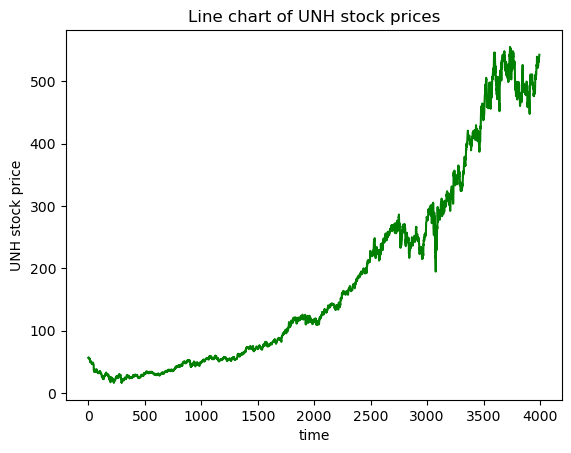

Generated Statistical Measures and Visualization for the ticker  UNH
  
Generating Statistical Measures and Visualization for the ticker  NI
ADF P-Value  0.7167070344702082
DFA Hurst Exponent  1.4732244416080333
Lyapunov Exponent  0.0011865156545317398
Skewness  -0.1821306949499983
Entropy  7.567121013338472
Max Entropy  7.738052297689316
The time series is highly unpredictable, likely indicating a high degree of stochasticity.


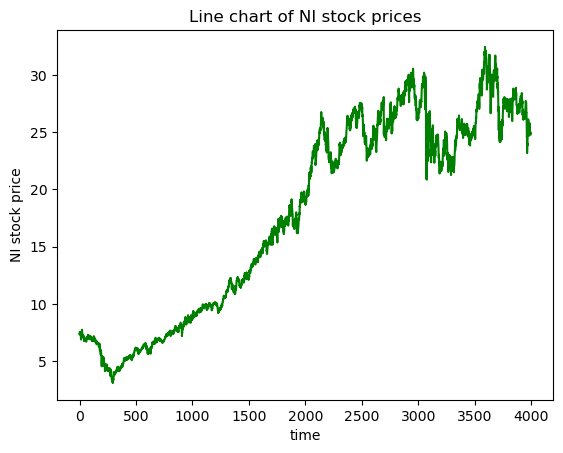

Generated Statistical Measures and Visualization for the ticker  NI
  
Generating Statistical Measures and Visualization for the ticker  ATO
ADF P-Value  0.8896489467665863
DFA Hurst Exponent  1.4335735432392065
Lyapunov Exponent  0.0016059172780891798
Skewness  0.13693629719495562
Entropy  7.923708453489239
Max Entropy  8.014004994779459
The time series is highly unpredictable, likely indicating a high degree of stochasticity.


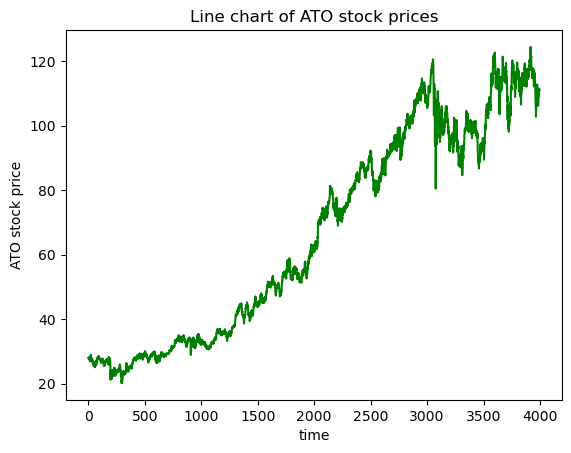

Generated Statistical Measures and Visualization for the ticker  ATO
  
Generating Statistical Measures and Visualization for the ticker  COST
ADF P-Value  0.99663634853021
DFA Hurst Exponent  1.4983884568771273
Lyapunov Exponent  0.0017927453244804528
Skewness  1.066204547864349
Entropy  8.167502069056114
Max Entropy  8.202208436436448
The time series is highly unpredictable, likely indicating a high degree of stochasticity.


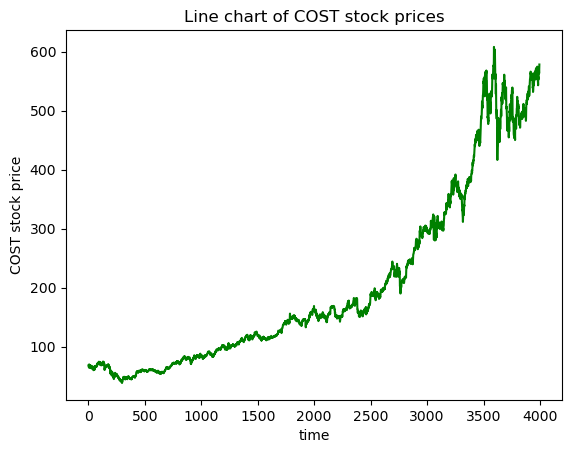

Generated Statistical Measures and Visualization for the ticker  COST
  
Generating Statistical Measures and Visualization for the ticker  FAST
ADF P-Value  0.9200583275972111
DFA Hurst Exponent  1.460376574623051
Lyapunov Exponent  0.0028252609989097505
Skewness  0.7924965247273257
Entropy  7.896684775184257
Max Entropy  7.993619994827744
The time series is highly unpredictable, likely indicating a high degree of stochasticity.


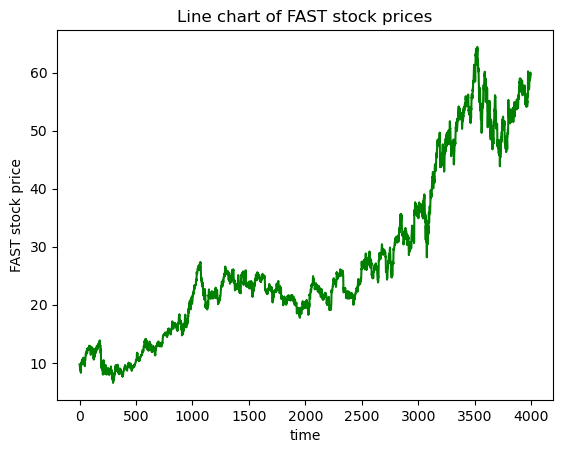

Generated Statistical Measures and Visualization for the ticker  FAST
  
Data Validation Metrics Saved to CSV File 


In [7]:
import numpy as np
import pandas as pd
import statsmodels.tsa.api as ts
import scipy.stats as ss
from statsmodels.stats.diagnostic import acorr_ljungbox
import matplotlib.pyplot as plt
import nolds as nl
from scipy.stats import entropy
import warnings
import os

df_tickers = pd.read_csv('./input/stock_tickers_data.csv', encoding= 'unicode_escape')
ticker_list = ['UNH','NI','ATO','COST','FAST']

num_tickers = len(ticker_list)

d = {'Ticker': ['' for _ in range(num_tickers)], 'ADF P-Value': ['' for _ in range(num_tickers)], 
     'DFA Hurst Exponent': ['' for _ in range(num_tickers)], 'Lyapunov Exponent': ['' for _ in range(num_tickers)],
     'Skewness': ['' for _ in range(num_tickers)], 'Entropy': ['' for _ in range(num_tickers)]}
df_out = pd.DataFrame(data=d)
warnings.filterwarnings("ignore")
for n in range(num_tickers): 
    ticker = ticker_list[n]
    file_path = './input/' + ticker + '.csv'
    if os.path.exists(file_path):
        try:
            print("Generating Statistical Measures and Visualization for the ticker ", ticker)
            df = pd.read_csv(file_path)
            date_data = df['Date']
            time_series_data = df['Close']
            adf_p_value = ts.adfuller(time_series_data)[1]
            print("ADF P-Value ", adf_p_value)
            dfa_hurst = nl.dfa(time_series_data)
            print("DFA Hurst Exponent ", dfa_hurst)
            lyapunov_exponent = nl.lyap_r(time_series_data)
            print("Lyapunov Exponent ", lyapunov_exponent)
            skewness = ss.skew(time_series_data)
            print("Skewness ", skewness)
            value, counts = np.unique(time_series_data, return_counts=True)

            ent = entropy(counts)

            print("Entropy ", ent)

            max_entropy = np.log(len(np.unique(time_series_data)))
            print("Max Entropy ", max_entropy)

            if ent > 0.9 * max_entropy:

                print("The time series is highly unpredictable, likely indicating a high degree of stochasticity.")

            elif ent > 0.5 * max_entropy:

                print("The time series is moderately unpredictable, suggesting a mix of stochastic and deterministic behavior.")

            else:

                print("The time series is fairly predictable, likely indicating deterministic behavior with low stochasticity.")

            df_out.at[n,'Ticker'] = ticker
            df_out.at[n,'ADF P-Value'] = adf_p_value
            df_out.at[n,'DFA Hurst Exponent'] = dfa_hurst
            df_out.at[n,'Lyapunov Exponent'] = lyapunov_exponent
            df_out.at[n,'Skewness'] = skewness
            df_out.at[n,'Entropy'] = ent
            
            plt.plot(time_series_data, color='green')
            plt.title(f"Line chart of {ticker} stock prices")
            plt.xlabel("time")
            plt.ylabel(f"{ticker} stock price")
            plt.show()

            print("Generated Statistical Measures and Visualization for the ticker ", ticker)
            print("  ")
        except Exception as e:
            print("Exception", str(e))
    
df_out.to_csv('./DataValidity/TS_Data_Validation_Metrics.csv')
print("Data Validation Metrics Saved to CSV File ")